In [62]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import naive_greedy_modularity_communities
from networkx.algorithms.community import louvain_communities
from networkx.algorithms.community import louvain_partitions
from netgraph import Graph


# communities examples

In [65]:
# create a modular graph
partition_sizes = [10, 20, 30, 40]
g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)

# since we created the graph, we know the best partition:
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1
        
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

In [78]:
node_to_community

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 2,
 31: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 2,
 40: 2,
 41: 2,
 42: 2,
 43: 2,
 44: 2,
 45: 2,
 46: 2,
 47: 2,
 48: 2,
 49: 2,
 50: 2,
 51: 2,
 52: 2,
 53: 2,
 54: 2,
 55: 2,
 56: 2,
 57: 2,
 58: 2,
 59: 2,
 60: 3,
 61: 3,
 62: 3,
 63: 3,
 64: 3,
 65: 3,
 66: 3,
 67: 3,
 68: 3,
 69: 3,
 70: 3,
 71: 3,
 72: 3,
 73: 3,
 74: 3,
 75: 3,
 76: 3,
 77: 3,
 78: 3,
 79: 3,
 80: 3,
 81: 3,
 82: 3,
 83: 3,
 84: 3,
 85: 3,
 86: 3,
 87: 3,
 88: 3,
 89: 3,
 90: 3,
 91: 3,
 92: 3,
 93: 3,
 94: 3,
 95: 3,
 96: 3,
 97: 3,
 98: 3,
 99: 3}

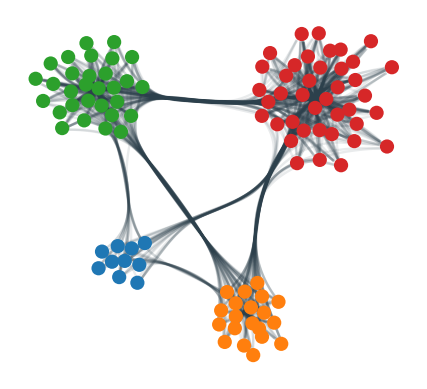

In [68]:
Graph(g,
      node_color=node_color, node_edge_width=0, edge_alpha=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
)

plt.show()

# matrix to graph

In [38]:
a = np.loadtxt(fname = "./incels/incels_matrix_reduced.csv", dtype = str)

In [39]:
y = []

for i in a:
    y.append(i.split(","))

In [40]:
y = np.array(y).astype(float)

In [46]:
for i in range(len(y)):
    y[i,i] = 0

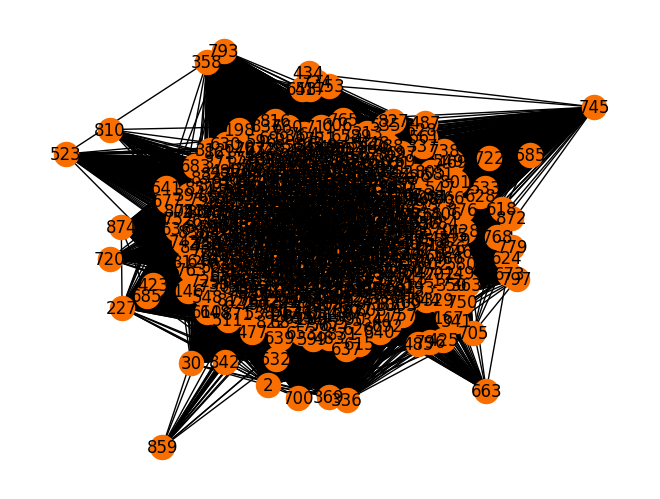

In [47]:
G = nx.from_numpy_array(y, create_using=nx.Graph)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")

[{515, 516, 5, 13, 530, 19, 20, 23, 29, 32, 554, 555, 44, 50, 565, 574, 575, 578, 579, 68, 75, 588, 591, 84, 601, 92, 93, 606, 609, 100, 102, 103, 107, 108, 622, 112, 115, 118, 122, 125, 638, 129, 141, 661, 150, 669, 159, 688, 178, 691, 694, 695, 701, 190, 192, 197, 201, 714, 718, 207, 209, 211, 724, 725, 214, 726, 728, 219, 733, 735, 225, 226, 740, 744, 233, 746, 751, 752, 753, 754, 756, 759, 760, 250, 765, 256, 774, 776, 777, 778, 781, 782, 272, 278, 282, 795, 284, 299, 300, 301, 304, 816, 307, 316, 318, 320, 321, 322, 833, 330, 847, 852, 340, 857, 862, 354, 868, 362, 875, 365, 381, 393, 398, 402, 409, 415, 418, 419, 451, 460, 463, 474, 489, 501, 504, 511}, {0, 1, 4, 6, 7, 518, 9, 522, 10, 12, 519, 14, 15, 16, 17, 529, 18, 528, 524, 22, 25, 26, 28, 543, 544, 33, 546, 35, 36, 37, 38, 551, 552, 553, 40, 47, 559, 562, 563, 53, 55, 568, 60, 63, 64, 65, 577, 69, 582, 72, 584, 77, 78, 79, 81, 594, 595, 603, 604, 608, 611, 613, 106, 109, 114, 117, 630, 119, 120, 121, 635, 123, 124, 128, 640

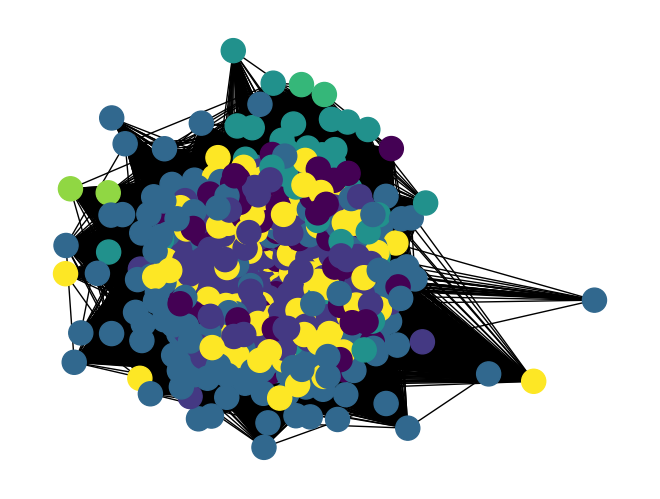

In [48]:
communities = louvain_communities(G, weight='weight', resolution=1, threshold=1e-07, seed=None)

print(communities)

colors = [x for x in range(100)]#["red", "orange", "blue", "black", "gold", "yellow", "green", "brown", "pink"]
color_map = []
for node in G:
    for j in range(len(list(communities))):
        if node in communities[j]:
            color_map.append(colors[j])


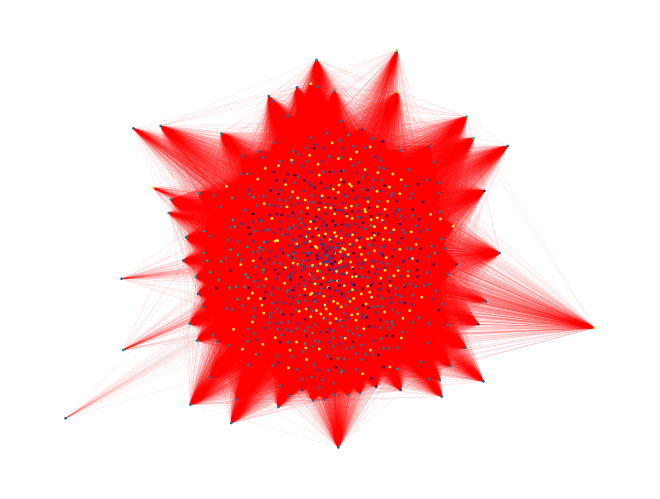

In [54]:
nx.draw(G, 
        node_color=color_map, 
        with_labels=False, 
        node_size=1, 
        width = 0.1, 
        edge_color = "red", 
        style = ":"#,
        #font_size = ""
       )
plt.show()

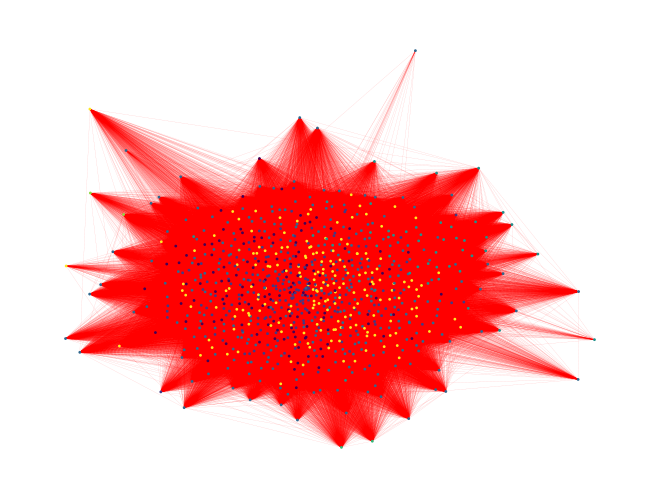

In [55]:
pos = nx.kamada_kawai_layout(G)

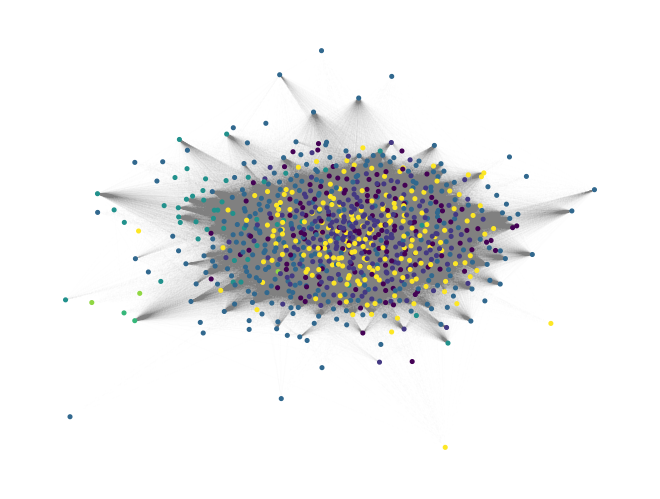

In [60]:
nx.draw(G, 
        node_color=color_map, 
        with_labels=False, 
        node_size=7, 
        width = 0.0005, 
        edge_color = "gray", 
        style = "-"#,
        #font_size = ""
       )
plt.show()

In [49]:
len(communities)

7

# trying to show communities

In [61]:
! pip install netgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 2.3 MB/s eta 0:00:00


In [82]:
node_to_communities = dict()

for i in range(len(communities)):
    for j in communities[i]:
        node_to_communities[j] = i

In [83]:
node_to_communities

{515: 0,
 516: 0,
 5: 0,
 13: 0,
 530: 0,
 19: 0,
 20: 0,
 23: 0,
 29: 0,
 32: 0,
 554: 0,
 555: 0,
 44: 0,
 50: 0,
 565: 0,
 574: 0,
 575: 0,
 578: 0,
 579: 0,
 68: 0,
 75: 0,
 588: 0,
 591: 0,
 84: 0,
 601: 0,
 92: 0,
 93: 0,
 606: 0,
 609: 0,
 100: 0,
 102: 0,
 103: 0,
 107: 0,
 108: 0,
 622: 0,
 112: 0,
 115: 0,
 118: 0,
 122: 0,
 125: 0,
 638: 0,
 129: 0,
 141: 0,
 661: 0,
 150: 0,
 669: 0,
 159: 0,
 688: 0,
 178: 0,
 691: 0,
 694: 0,
 695: 0,
 701: 0,
 190: 0,
 192: 0,
 197: 0,
 201: 0,
 714: 0,
 718: 0,
 207: 0,
 209: 0,
 211: 0,
 724: 0,
 725: 0,
 214: 0,
 726: 0,
 728: 0,
 219: 0,
 733: 0,
 735: 0,
 225: 0,
 226: 0,
 740: 0,
 744: 0,
 233: 0,
 746: 0,
 751: 0,
 752: 0,
 753: 0,
 754: 0,
 756: 0,
 759: 0,
 760: 0,
 250: 0,
 765: 0,
 256: 0,
 774: 0,
 776: 0,
 777: 0,
 778: 0,
 781: 0,
 782: 0,
 272: 0,
 278: 0,
 282: 0,
 795: 0,
 284: 0,
 299: 0,
 300: 0,
 301: 0,
 304: 0,
 816: 0,
 307: 0,
 316: 0,
 318: 0,
 320: 0,
 321: 0,
 322: 0,
 833: 0,
 330: 0,
 847: 0,
 852: 0,
 340: 0

In [87]:

community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
    4 : 'tab:gray',
    5 : 'tab:black',
    6 : 'tab:white',
    7 : 'tab:yellow',
    8 : 'tab:pink',
}
node_color = {node: community_to_color[communities] for node, communities in node_to_communities.items()}

In [ ]:
Graph(G,
      node_color=node_color, node_edge_width=0, edge_alpha=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_communities),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
)

plt.show()